# Data Collection API

In [1]:
# Requests allows us to make HTTP requests which we will use to get data from an API
import requests
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Datetime is a library that allows us to represent dates
import datetime

# Setting this option will print all collumns of a dataframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the data in a feature
pd.set_option('display.max_colwidth', None)

In [2]:
# Takes the dataset and uses the rocket column to call the API and append the data to the list
def getBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

In [3]:
# Takes the dataset and uses the launchpad column to call the API and append the data to the list
def getLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

In [4]:
# Takes the dataset and uses the payloads column to call the API and append the data to the lists
def getPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [5]:
# Takes the dataset and uses the cores column to call the API and append the data to the lists
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [6]:
spacex_url="https://api.spacexdata.com/v4/launches/past"

In [7]:
response = requests.get(spacex_url)

In [8]:
print(response.content)

b'[{"fairings":{"reused":false,"recovery_attempt":false,"recovered":false,"ships":[]},"links":{"patch":{"small":"https://images2.imgbox.com/94/f2/NN6Ph45r_o.png","large":"https://images2.imgbox.com/5b/02/QcxHUb5V_o.png"},"reddit":{"campaign":null,"launch":null,"media":null,"recovery":null},"flickr":{"small":[],"original":[]},"presskit":null,"webcast":"https://www.youtube.com/watch?v=0a_00nJ_Y88","youtube_id":"0a_00nJ_Y88","article":"https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html","wikipedia":"https://en.wikipedia.org/wiki/DemoSat"},"static_fire_date_utc":"2006-03-17T00:00:00.000Z","static_fire_date_unix":1142553600,"net":false,"window":0,"rocket":"5e9d0d95eda69955f709d1eb","success":false,"failures":[{"time":33,"altitude":null,"reason":"merlin engine failure"}],"details":"Engine failure at 33 seconds and loss of vehicle","crew":[],"ships":[],"capsules":[],"payloads":["5eb0e4b5b6c3bb0006eeb1e1"],"launchpad":"5e9e4502f5090995de566f86","flight_number":1,"name

In [9]:
static_json_url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

In [10]:
response.status_code

200

In [11]:
# Use json_normalize meethod to convert the json result into a dataframe
data=pd.json_normalize(response.json())

In [12]:
# Get the head of the dataframe
data.head()

static_fire_date_utc  static_fire_date_unix    net  window  \
0  2006-03-17T00:00:00.000Z           1.142554e+09  False     0.0   
1                      None                    NaN  False     0.0   
2                      None                    NaN  False     0.0   
3  2008-09-20T00:00:00.000Z           1.221869e+09  False     0.0   
4                      None                    NaN  False     0.0   

                     rocket success  \
0  5e9d0d95eda69955f709d1eb   False   
1  5e9d0d95eda69955f709d1eb   False   
2  5e9d0d95eda69955f709d1eb   False   
3  5e9d0d95eda69955f709d1eb    True   
4  5e9d0d95eda69955f709d1eb    True   

                                                                                                            failures  \
0                                                [{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]   
1            [{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]   
2  [{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]   
3                                                                                                                 []   
4                                                                                                                 []   

                                                                                                                                                                                details  \
0                                                                                                                                      Engine failure at 33 seconds and loss of vehicle   
1  Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage   
2                                                                                                                  Residual stage 1 thrust led to collision between stage 1 and stage 2   
3                        Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1   
4                                                                                                                                                                                  None   

  crew ships capsules                                              payloads  \
0   []    []       []                            [5eb0e4b5b6c3bb0006eeb1e1]   
1   []    []       []                            [5eb0e4b6b6c3bb0006eeb1e2]   
2   []    []       []  [5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]   
3   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e5]   
4   []    []       []                            [5eb0e4b7b6c3bb0006eeb1e6]   

                  launchpad  flight_number         name  \
0  5e9e4502f5090995de566f86              1    FalconSat   
1  5e9e4502f5090995de566f86              2      DemoSat   
2  5e9e4502f5090995de566f86              3  Trailblazer   
3  5e9e4502f5090995de566f86              4       RatSat   
4  5e9e4502f5090995de566f86              5     RazakSat   

                   date_utc   date_unix                 date_local  \
0  2006-03-24T22:30:00.000Z  1143239400  2006-03-25T10:30:00+12:00   
1  2007-03-21T01:10:00.000Z  1174439400  2007-03-21T13:10:00+12:00   
2  2008-08-03T03:34:00.000Z  1217734440  2008-08-03T15:34:00+12:00   
3  2008-09-28T23:15:00.000Z  1222643700  2008-09-28T11:15:00+12:00   
4  2009-07-13T03:35:00.000Z  1247456100  2009-07-13T15:35:00+12:00   

  date_precision  upcoming  \
0           hour     False   
1           hour     False   
2           hour     False   
3           hour     False   
4           hour     False   

                                                                                 

In [13]:
# Lets take a subset of our dataframe keeping only the features we want and the flight number, and date_utc.
data = data[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# We will remove rows with multiple cores because those are falcon rockets with 2 extra rocket boosters and rows that have multiple payloads in a single rocket.
data = data[data['cores'].map(len)==1]
data = data[data['payloads'].map(len)==1]

# Since payloads and cores are lists of size 1 we will also extract the single value in the list and replace the feature.
data['cores'] = data['cores'].map(lambda x : x[0])
data['payloads'] = data['payloads'].map(lambda x : x[0])

# We also want to convert the date_utc to a datetime datatype and then extracting the date leaving the time
data['date'] = pd.to_datetime(data['date_utc']).dt.date

# Using the date we will restrict the dates of the launches
data = data[data['date'] <= datetime.date(2020, 11, 13)]

In [14]:
#Global variables 
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

In [15]:
BoosterVersion

[]

In [16]:
# Call getBoosterVersion
getBoosterVersion(data)

In [17]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [18]:
# Call getLaunchSite
getLaunchSite(data)

In [19]:
# Call getPayloadData
getPayloadData(data)

In [20]:
# Call getCoreData
getCoreData(data)

In [21]:
launch_dict = {'FlightNumber': list(data['flight_number']),
'Date': list(data['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}


In [22]:
# Create a data from launch_dict
data=pd.DataFrame(launch_dict)

In [23]:
# Show the head of the dataframe
data.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit  \
0             1  2006-03-24       Falcon 1         20.0   LEO   
1             2  2007-03-21       Falcon 1          NaN   LEO   
2             4  2008-09-28       Falcon 1        165.0   LEO   
3             5  2009-07-13       Falcon 1        200.0   LEO   
4             6  2010-06-04       Falcon 9          NaN   LEO   

        LaunchSite    Outcome  Flights  GridFins  Reused   Legs LandingPad  \
0  Kwajalein Atoll  None None        1     False   False  False       None   
1  Kwajalein Atoll  None None        1     False   False  False       None   
2  Kwajalein Atoll  None None        1     False   False  False       None   
3  Kwajalein Atoll  None None        1     False   False  False       None   
4     CCSFS SLC 40  None None        1     False   False  False       None   

   Block  ReusedCount    Serial   Longitude   Latitude  
0    NaN            0  Merlin1A  167.743129   9.047721  
1    NaN            0  Merlin2A  167.743129   9.047721  
2    NaN            0  Merlin2C  167.743129   9.047721  
3    NaN            0  Merlin3C  167.743129   9.047721  
4    1.0            0     B0003  -80.577366  28.561857

In [24]:
# Hint data['BoosterVersion']!='Falcon 1'
data_falcon9=data[data['BoosterVersion']!='Falcon 1']

In [25]:
data_falcon9.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             6  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5             8  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6            10  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7            11  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8            12  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5            0  B0005  -80.577366  28.561857  
6            0  B0007  -80.577366  28.561857  
7            0  B1003 -120.610829  34.632093  
8            0  B1004  -80.577366  28.561857

In [26]:
data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))
data_falcon9

C:\Users\bjkha\AppData\Local\Temp\ipykernel_13196\4023201451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9.loc[:,'FlightNumber'] = list(range(1, data_falcon9.shape[0]+1))


FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4              1  2010-06-04       Falcon 9          NaN   LEO  CCSFS SLC 40   
5              2  2012-05-22       Falcon 9        525.0   LEO  CCSFS SLC 40   
6              3  2013-03-01       Falcon 9        677.0   ISS  CCSFS SLC 40   
7              4  2013-09-29       Falcon 9        500.0    PO   VAFB SLC 4E   
8              5  2013-12-03       Falcon 9       3170.0   GTO  CCSFS SLC 40   
..           ...         ...            ...          ...   ...           ...   
89            86  2020-09-03       Falcon 9      15600.0  VLEO    KSC LC 39A   
90            87  2020-10-06       Falcon 9      15600.0  VLEO    KSC LC 39A   
91            88  2020-10-18       Falcon 9      15600.0  VLEO    KSC LC 39A   
92            89  2020-10-24       Falcon 9      15600.0  VLEO  CCSFS SLC 40   
93            90  2020-11-05       Falcon 9       3681.0   MEO  CCSFS SLC 40   

        Outcome  Flights  GridFins  Reused   Legs                LandingPad  \
4     None None        1     False   False  False                      None   
5     None None        1     False   False  False                      None   
6     None None        1     False   False  False                      None   
7   False Ocean        1     False   False  False                      None   
8     None None        1     False   False  False                      None   
..          ...      ...       ...     ...    ...                       ...   
89    True ASDS        2      True    True   True  5e9e3032383ecb6bb234e7ca   
90    True ASDS        3      True    True   True  5e9e3032383ecb6bb234e7ca   
91    True ASDS        6      True    True   True  5e9e3032383ecb6bb234e7ca   
92    True ASDS        3      True    True   True  5e9e3033383ecbb9e534e7cc   
93    True ASDS        1      True   False   True  5e9e3032383ecb6bb234e7ca   

    Block  ReusedCount Serial   Longitude   Latitude  
4     1.0            0  B0003  -80.577366  28.561857  
5     1.0            0  B0005  -80.577366  28.561857  
6     1.0            0  B0007  -80.577366  28.561857  
7     1.0            0  B1003 -120.610829  34.632093  
8     1.0            0  B1004  -80.577366  28.561857  
..    ...          ...    ...         ...        ...  
89    5.0           12  B1060  -80.603956  28.608058  
90    5.0           13  B1058  -80.603956  28.608058  
91    5.0           12  B1051  -80.603956  28.608058  
92    5.0           12  B1060  -80.577366  28.561857  
93    5.0            8  B1062  -80.577366  28.561857  

[90 rows x 17 columns]

In [27]:
data_falcon9.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [29]:
data_falcon9['PayloadMass'].fillna(data_falcon9['PayloadMass'].mean(), inplace=True)
data_falcon9.head()

C:\Users\bjkha\AppData\Local\Temp\ipykernel_13196\940380137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_falcon9['PayloadMass'].fillna(data_falcon9['PayloadMass'].mean(), inplace=True)


FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
4             1  2010-06-04       Falcon 9  6123.547647   LEO  CCSFS SLC 40   
5             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
6             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
7             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
8             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
4    None None        1     False   False  False       None    1.0   
5    None None        1     False   False  False       None    1.0   
6    None None        1     False   False  False       None    1.0   
7  False Ocean        1     False   False  False       None    1.0   
8    None None        1     False   False  False       None    1.0   

   ReusedCount Serial   Longitude   Latitude  
4            0  B0003  -80.577366  28.561857  
5            0  B0005  -80.577366  28.561857  
6            0  B0007  -80.577366  28.561857  
7            0  B1003 -120.610829  34.632093  
8            0  B1004  -80.577366  28.561857

In [31]:
data_falcon9.to_csv('dataset_part_1.csv', index=False)

# WebScraping

In [33]:
import sys

import requests
from bs4 import BeautifulSoup
import re
import unicodedata
import pandas as pd

In [34]:
def date_time(table_cells):
    """
    This function returns the data and time from the HTML  table cell
    Input: the  element of a table data cell extracts extra row
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    This function returns the booster version from the HTML  table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    This function returns the landing status from the HTML table cell 
    Input: the  element of a table data cell extracts extra row
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filter the digit and empty names
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name    


In [35]:
static_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

In [48]:
response=requests.get(static_url).text

In [49]:
soup = BeautifulSoup(response,'html5lib')

In [50]:
soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-feature-typography-survey-disabled vector-toc-available" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   List of Falcon 9 and Falcon Heavy launches - Wikipedia\n  </title>\n  <script>\n   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-

In [51]:
soup.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [52]:
html_tables=soup.find_all('table')

In [53]:
first_launch_table = html_tables[2]
print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11">[b]</a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12">[c]</a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 9 first-stage landing tests">Booster<br/>landing</a>
</th></tr>
<tr>
<th rowspan="2" scope="row" style="text-align:center;">1
</th>
<td>

In [67]:
column_names = []
#Get all rows from the table
for row in first_launch_table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('th') 
    column_names.append(cols)

In [77]:
column_names = []
#Get all rows from the table
for row in first_launch_table.find_all('th'):
    col=extract_column_from_header(row)
    if col != 'None':
        column_names.append(col)

In [78]:
column_names

['Flight No.',
 'Date and time ( )',
 '',
 'Launch site',
 'Payload',
 'Payload mass',
 'Orbit',
 'Customer',
 'Launch outcome',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [82]:
launch_dict= dict.fromkeys(column_names)

# Remove an irrelvant column
del launch_dict['Date and time ( )']
del launch_dict['']
del launch_dict[None]

# Let's initial the launch_dict with each value to be an empty list
launch_dict['Flight No.'] = []
launch_dict['Launch site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Added some new columns
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

In [83]:
launch_dict

{'Flight No.': [],
 'Launch site': [],
 'Payload': [],
 'Payload mass': [],
 'Orbit': [],
 'Customer': [],
 'Launch outcome': [],
 'Version Booster': [],
 'Booster landing': [],
 'Date': [],
 'Time': []}

In [98]:
extracted_row = 0
#Extract each table 
for table_number,table in enumerate(soup.find_all('table',"wikitable plainrowheaders collapsible")):
   # get table row 
    for rows in table.find_all("tr"):
        #check to see if first table heading is as number corresponding to launch a number 
        if rows.th:
            if rows.th.string:
                flight_number=rows.th.string.strip()
                flag=flight_number.isdigit()
        else:
            flag=False
        #get table element 
        row=rows.find_all('td')
        #if it is number save cells in a dictonary 
        if flag:
            extracted_row += 1
            launch_dict['Flight No.'].append(flight_number)
            # Flight Number value
            # TODO: Append the flight_number into launch_dict with key `Flight No.`
            print(flight_number)
            datatimelist=date_time(row[0])
            
            # Date value
            # TODO: Append the date into launch_dict with key `Date`
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            print(date)
            
            # Time value
            # TODO: Append the time into launch_dict with key `Time`
            time = datatimelist[1]
            launch_dict['Time'].append(time)
            print(time)
              
            # Booster version
            # TODO: Append the bv into launch_dict with key `Version Booster`
            bv=booster_version(row[1])
            if not(bv):
                bv=row[1].a.string
                launch_dict['Version Booster'].append(bv)
            print(bv)
            
            # Launch Site
            # TODO: Append the bv into launch_dict with key `Launch Site`
            launch_site = row[2].a.string
            launch_dict['Launch site'].append(launch_site)
            print(launch_site)
            
            # Payload
            # TODO: Append the payload into launch_dict with key `Payload`
            payload = row[3].a.string
            launch_dict['Payload'].append(payload)
            print(payload)
            
            # Payload Mass
            # TODO: Append the payload_mass into launch_dict with key `Payload mass`
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            print(payload_mass)
            
            # Orbit
            # TODO: Append the orbit into launch_dict with key `Orbit`
            orbit = row[5].a.string
            launch_dict['Orbit'].append(orbit)
            print(orbit)
            
            # Customer
            # TODO: Append the customer into launch_dict with key `Customer`
            customer = row[6].a.string
            launch_dict['Customer'].append(customer)
            print(customer)
            
            # Launch outcome
            # TODO: Append the launch_outcome into launch_dict with key `Launch outcome`
            launch_outcome = list(row[7].strings)[0]
            launch_dict['Launch outcome'].append(launch_outcome)
            print(launch_outcome)
            
            # Booster landing
            # TODO: Append the launch_outcome into launch_dict with key `Booster landing`
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)
            print(booster_landing)
            

1
4 June 2010
18:45
F9 v1.0B0003.1
CCAFS
Dragon Spacecraft Qualification Unit
0
LEO
SpaceX
Success

Failure
2
8 December 2010
15:43
F9 v1.0B0004.1
CCAFS
Dragon
0
LEO
NASA
Success
Failure
3
22 May 2012
07:44
F9 v1.0B0005.1
CCAFS
Dragon
525 kg
LEO
NASA
Success
Not attempted

4
8 October 2012
00:35
F9 v1.0B0006.1
CCAFS
SpaceX CRS-1
4,700 kg
LEO
NASA
Success

No attempt
5
1 March 2013
15:10
F9 v1.0B0007.1
CCAFS
SpaceX CRS-2
4,877 kg
LEO
NASA
Success

Not attempted

6
29 September 2013
16:00
F9 v1.1B1003
VAFB
CASSIOPE
500 kg
Polar orbit
MDA
Success
Uncontrolled
7
3 December 2013
22:41
F9 v1.1
CCAFS
SES-8
3,170 kg
GTO
SES
Success
Not attempted
8
6 January 2014
22:06
F9 v1.1
CCAFS
Thaicom 6
3,325 kg
GTO
Thaicom
Success
Not attempted
9
18 April 2014
19:25
F9 v1.1
Cape Canaveral
SpaceX CRS-3
2,296 kg
LEO
NASA
Success

Controlled
10
14 July 2014
15:15
F9 v1.1
Cape Canaveral
Orbcomm-OG2
1,316 kg
LEO
Orbcomm
Success
Controlled
11
5 August 2014
08:00
F9 v1.1
Cape Canaveral
AsiaSat 8
4,535 kg
GTO
As

AttributeError: 'NoneType' object has no attribute 'string'

In [103]:
df1= pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })

In [104]:
df1.head()

Flight No. Launch site                               Payload Payload mass  \
0          1       CCAFS  Dragon Spacecraft Qualification Unit            0   
1          2       CCAFS                                Dragon            0   
2          3       CCAFS                                Dragon       525 kg   
3          4       CCAFS                          SpaceX CRS-1     4,700 kg   
4          5       CCAFS                          SpaceX CRS-2     4,877 kg   

  Orbit Customer Launch outcome Version Booster  Booster landing  \
0   LEO   SpaceX      Success\n         F9 v1.1          Failure   
1   LEO     NASA        Success         F9 v1.1          Failure   
2   LEO     NASA        Success         F9 v1.1  Not attempted\n   
3   LEO     NASA      Success\n         F9 v1.1       No attempt   
4   LEO     NASA      Success\n         F9 v1.1  Not attempted\n   

              Date   Time  
0      4 June 2010  18:45  
1  8 December 2010  15:43  
2      22 May 2012  07:44  
3   8 October 2012  00:35  
4     1 March 2013  15:10

In [105]:
df1.shape

(1272, 11)

In [106]:
df1.to_csv('spacex_web_scraped.csv', index=False)

# Data Wrangling

In [107]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_1.csv")
df.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  
0            0  B0003  -80.577366  28.561857  
1            0  B0005  -80.577366  28.561857  
2            0  B0007  -80.577366  28.561857  
3            0  B1003 -120.610829  34.632093  
4            0  B1004  -80.577366  28.561857

In [108]:
df.isnull().sum()/len(df)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [109]:
# Apply value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [110]:
# Apply value_counts on Orbit column
df['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [111]:
# landing_outcomes = values on Outcome column
landing_outcomes=df['Outcome'].value_counts()
landing_outcomes

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [112]:
for i,outcome in enumerate(landing_outcomes.keys()):
    print(i,outcome)

0 True ASDS
1 None None
2 True RTLS
3 False ASDS
4 True Ocean
5 False Ocean
6 None ASDS
7 False RTLS


In [113]:
bad_outcomes=set(landing_outcomes.keys()[[1,3,5,6,7]])
bad_outcomes

{'False ASDS', 'False Ocean', 'False RTLS', 'None ASDS', 'None None'}

In [127]:
landing_class=[]
for x in df['Outcome']:
    if x in bad_outcomes:
        x=0
    else:
        x=1
    landing_class.append(x)

In [128]:
landing_class

[0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [130]:
df['Class']=landing_class
df.head(8)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   
5             6  2014-01-06       Falcon 9  3325.000000   GTO  CCAFS SLC 40   
6             7  2014-04-18       Falcon 9  2296.000000   ISS  CCAFS SLC 40   
7             8  2014-07-14       Falcon 9  1316.000000   LEO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   
5    None None        1     False   False  False        NaN    1.0   
6   True Ocean        1     False   False   True        NaN    1.0   
7   True Ocean        1     False   False   True        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0  
5            0  B1005  -80.577366  28.561857      0  
6            0  B1006  -80.577366  28.561857      1  
7            0  B1007  -80.577366  28.561857      1

In [131]:
df["Class"].mean()

0.6666666666666666

In [132]:
df.to_csv("dataset_part_2.csv", index=False)

# EDA

In [134]:
!pip install sqlalchemy==2.0

     ---------------------------------------- 1.9/1.9 MB 5.4 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 1.3.9
    Uninstalling SQLAlchemy-1.3.9:
      Successfully uninstalled SQLAlchemy-1.3.9


In [135]:
%load_ext sql

In [136]:
import csv, sqlite3

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

In [137]:
!pip install -q pandas==1.1.5

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bjkha\\anaconda3\\Lib\\site-packages\\~andas\\_libs\\algos.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [138]:
%sql sqlite:///my_data1.db

In [139]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

101

In [140]:
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
Done.


[]

In [158]:
%sql select * from SPACEXTBL 

 * sqlite:///my_data1.db
Done.


[('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)'),
 ('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)'),
 ('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt'),
 ('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-09-29', '16:00:00', 'F9 v1.1  B1003', 'VAFB SLC-4E', 'CASSIOPE', 500, 'Polar LEO', 'MDA', 'Success', 'Uncontrolled (ocean)'),
 ('2013-12-03', '22:41:00', 'F9 v1.1', 'CCAFS LC-40', 'SES-8', 3170, 'GTO', 'SES', 'Success', 'No attempt'),
 ('2014-01-06', '22:06:00', 'F9 v1.1', 'CCAFS LC-40', 'Thaicom 6', 3325, 'GTO', 'Thaicom', 'Success', 'No attempt'),
 ('2014-04-18', '19:25:00', 'F9 v1.1', 'CCAFS LC-40', 'SpaceX CRS-3', 2296, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Controlled (ocean)'),
 ('2014-07-14', '15:15:00', 'F9 v1.1', 'CCAFS LC-40', 'OG2 Mission 1  6 Orbcomm-OG2 satellites', 1316, 'LEO', 'Orbcomm', 'Success', 'Controlled (ocean)'),
 ('2014-08-05', '8:00:00', 'F9 v1.1', 'CCAFS LC-40', 'AsiaSat 8', 4535, 'GTO', 'AsiaSat', 'Success', 'No attempt'),
 ('2014-09-07', '5:00:00', 'F9 v1.1 B1011', 'CCAFS LC-40', 'AsiaSat 6', 4428, 'GTO', 'AsiaSat', 'Success', 'No attempt'),
 ('2014-09-21', '5:52:00', 'F9 v1.1 B1010', 'CCAFS LC-40', 'SpaceX CRS-4', 2216, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Uncontrolled (ocean)'),
 ('2015-01-10', '9:47:00', 'F9 v1.1 B1012', 'CCAFS LC-40', 'SpaceX CRS-5', 2395, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Failure (drone ship)'),
 ('2015-02-11', '23:03:00', 'F9 v1.1 B1013', 'CCAFS LC-40', 'DSCOVR', 570, 'HEO', 'U.S. Air Force NASA NOAA', 'Success', 'Controlled (ocean)'),
 ('2015-03-02', '3:50:00', 'F9 v1.1 B1014', 'CCAFS LC-40', 'ABS-3A Eutelsat 115 West B', 4159, 'GTO', 'ABS Eutelsat', 'Success', 'No attempt'),
 ('2015-04-14', '20:10:00', 'F9 v1.1 B1015', 'CCAFS LC-40', 'SpaceX CRS-6', 1898, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Failure (drone ship)'),
 ('2015-04-27', '23:03:00', 'F9 v1.1 B1016', 'CCAFS LC-40', 'Turkmen 52 / MonacoSAT', 4707, 'GTO', 'Turkmenistan National Space Agency', 'Success', 'No attempt'),
 ('2015-06-28', '14:21:00', 'F9 v1.1 B1018', 'CCAFS LC-40', 'SpaceX CRS-7', 1952, 'LEO (ISS)', 'NASA (CRS)', 'Failure (in flight)', 'Precluded (drone ship)'),
 ('2015-12-22', '1:29:00', 'F9 FT B1019', 'CCAFS LC-40', 'OG2 Mission 2  11 Orbcomm-OG2 satellites', 2034, 'LEO', 'Orbcomm', 'Success', 'Success (ground pad)'),
 ('2016-01-17', '18:42:00', 'F9 v1.1 B1017', 'VAFB SLC-4E', 'Jason-3', 553, 'LEO', 'NASA (LSP) NOAA CNES', 'Success', 'Failure (drone ship)'),
 ('2016-03-04', '23:35:00', 'F9 FT B1020', 'CCAFS LC-40', 'SES-9', 5271, 'GTO', 'SES', 'Success', 'Failure (drone ship)'),
 ('2016-04-08', '20:43:00', 'F9 FT B1021.1', 'CCAFS LC-40', 'SpaceX CRS-8', 3136, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Success (drone ship)'),
 ('2016-05-06', '5:21:00', 'F9 FT B1022', 'CCAFS LC-40', 'JCSAT-14', 4696, 'GTO', 'SKY Perfect JSAT Group', 'Success', 'Success (drone ship)'),
 ('2016-05-27', '21:39:00', 'F9 FT B1023.1', 'CCAFS LC-40', 'Thaicom 8', 3100, 'GTO', 'Thaicom', 'Success', 'Success (drone ship)'),
 ('2016-06-15', '14:29:00', 'F9 FT B1024', 'CCAFS LC-40', 'ABS-2A Eutelsat 117 West B', 3600, 'GTO', 'ABS Eutelsat', 'Success', 'Failure (drone ship)'),
 ('2016-07-18', '4:45:00', 'F9 FT B1025.1', 'CCAFS LC-40', 'SpaceX CRS-9', 2257, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'Success (ground pad)'),
 ('2016-08-14', '5:26:00', 'F9 FT B1026', 'CCAFS LC-40', 'JCSAT-16', 4600, 'GTO', 'SKY Perfect JSAT Group', 'Success', 'Success (drone ship)'),
 ('2017-01-1

In [144]:
%%sql
select distinct(Launch_Site) from SPACEXTBL

 * sqlite:///my_data1.db
Done.


[('CCAFS LC-40',), ('VAFB SLC-4E',), ('KSC LC-39A',), ('CCAFS SLC-40',)]

In [146]:
%%sql
select * from SPACEXTBL where Launch_Site like '%CCA%' limit 5

 * sqlite:///my_data1.db
Done.


[('2010-06-04', '18:45:00', 'F9 v1.0  B0003', 'CCAFS LC-40', 'Dragon Spacecraft Qualification Unit', 0, 'LEO', 'SpaceX', 'Success', 'Failure (parachute)'),
 ('2010-12-08', '15:43:00', 'F9 v1.0  B0004', 'CCAFS LC-40', 'Dragon demo flight C1, two CubeSats, barrel of Brouere cheese', 0, 'LEO (ISS)', 'NASA (COTS) NRO', 'Success', 'Failure (parachute)'),
 ('2012-05-22', '7:44:00', 'F9 v1.0  B0005', 'CCAFS LC-40', 'Dragon demo flight C2', 525, 'LEO (ISS)', 'NASA (COTS)', 'Success', 'No attempt'),
 ('2012-10-08', '0:35:00', 'F9 v1.0  B0006', 'CCAFS LC-40', 'SpaceX CRS-1', 500, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt'),
 ('2013-03-01', '15:10:00', 'F9 v1.0  B0007', 'CCAFS LC-40', 'SpaceX CRS-2', 677, 'LEO (ISS)', 'NASA (CRS)', 'Success', 'No attempt')]

In [150]:
%%sql
select sum(PAYLOAD_MASS__KG_) from SPACEXTBL where customer == 'NASA (CRS)'

 * sqlite:///my_data1.db
Done.


[(45596,)]

In [153]:
%%sql
select avg(PAYLOAD_MASS__KG_) from SPACEXTBL where Booster_Version == 'F9 v1.1'

 * sqlite:///my_data1.db
Done.


[(2928.4,)]

In [161]:
%%sql
select min(Date) from SPACEXTBL where Landing_Outcome == 'Success'

 * sqlite:///my_data1.db
Done.


[('2018-07-22',)]

In [176]:
%%sql
select Booster_Version from SPACEXTBL where landing_Outcome == 'Success (drone ship)' and PAYLOAD_MASS__KG_ > 4000 and PAYLOAD_MASS__KG_ <6000

 * sqlite:///my_data1.db
Done.


[('F9 FT B1022',), ('F9 FT B1026',), ('F9 FT  B1021.2',), ('F9 FT  B1031.2',)]

In [168]:
%%sql
select count(Mission_Outcome) from SPACEXTBL 

 * sqlite:///my_data1.db
Done.


[(101,)]

In [175]:
%%sql
select Booster_Version, PAYLOAD_MASS__KG_ from SPACEXTBL where PAYLOAD_MASS__KG_=(select max(PAYLOAD_MASS__KG_) from SPACEXTBL)

 * sqlite:///my_data1.db
Done.


[('F9 B5 B1048.4', 15600),
 ('F9 B5 B1049.4', 15600),
 ('F9 B5 B1051.3', 15600),
 ('F9 B5 B1056.4', 15600),
 ('F9 B5 B1048.5', 15600),
 ('F9 B5 B1051.4', 15600),
 ('F9 B5 B1049.5', 15600),
 ('F9 B5 B1060.2 ', 15600),
 ('F9 B5 B1058.3 ', 15600),
 ('F9 B5 B1051.6', 15600),
 ('F9 B5 B1060.3', 15600),
 ('F9 B5 B1049.7 ', 15600)]

In [194]:
%%sql 
select landing_Outcome, Date from SPACEXTBL where (landing_Outcome == 'Success (ground pad)' 
                                                   or landing_Outcome == 'Failure(droneship)')
and (Date > '2010-06-04' or Date < '2017-03-20' )

 * sqlite:///my_data1.db
Done.


[('Success (ground pad)', '2015-12-22'),
 ('Success (ground pad)', '2016-07-18'),
 ('Success (ground pad)', '2017-02-19'),
 ('Success (ground pad)', '2017-05-01'),
 ('Success (ground pad)', '2017-06-03'),
 ('Success (ground pad)', '2017-08-14'),
 ('Success (ground pad)', '2017-09-07'),
 ('Success (ground pad)', '2017-12-15'),
 ('Success (ground pad)', '2018-01-08')]

# EDA2

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")
df.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

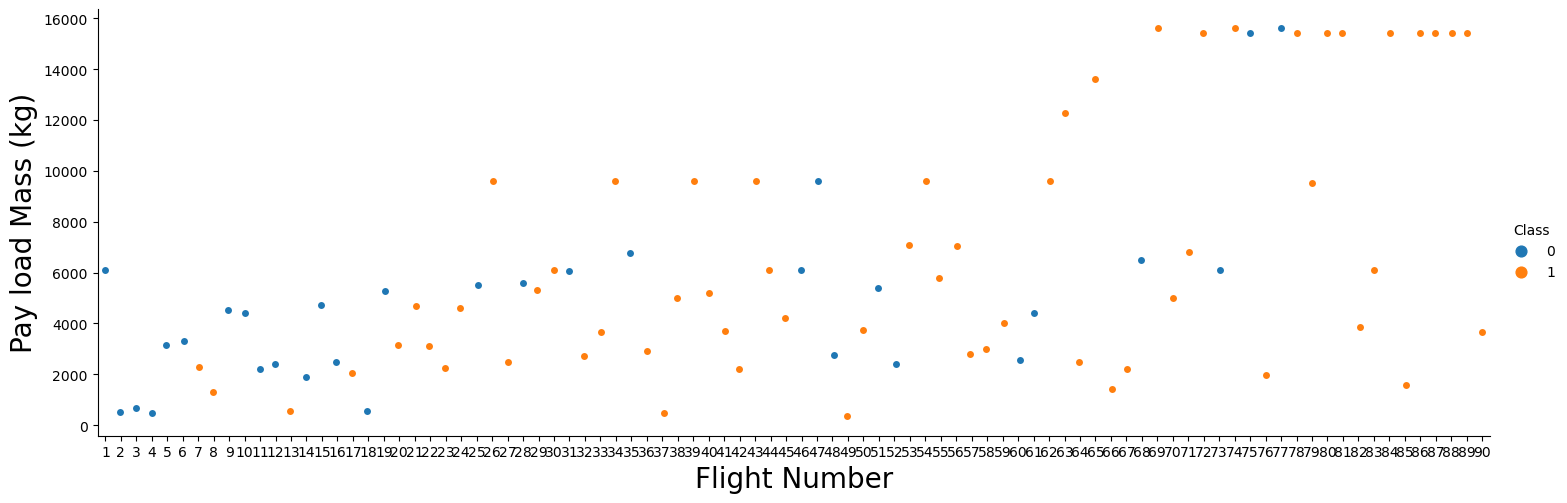

In [211]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

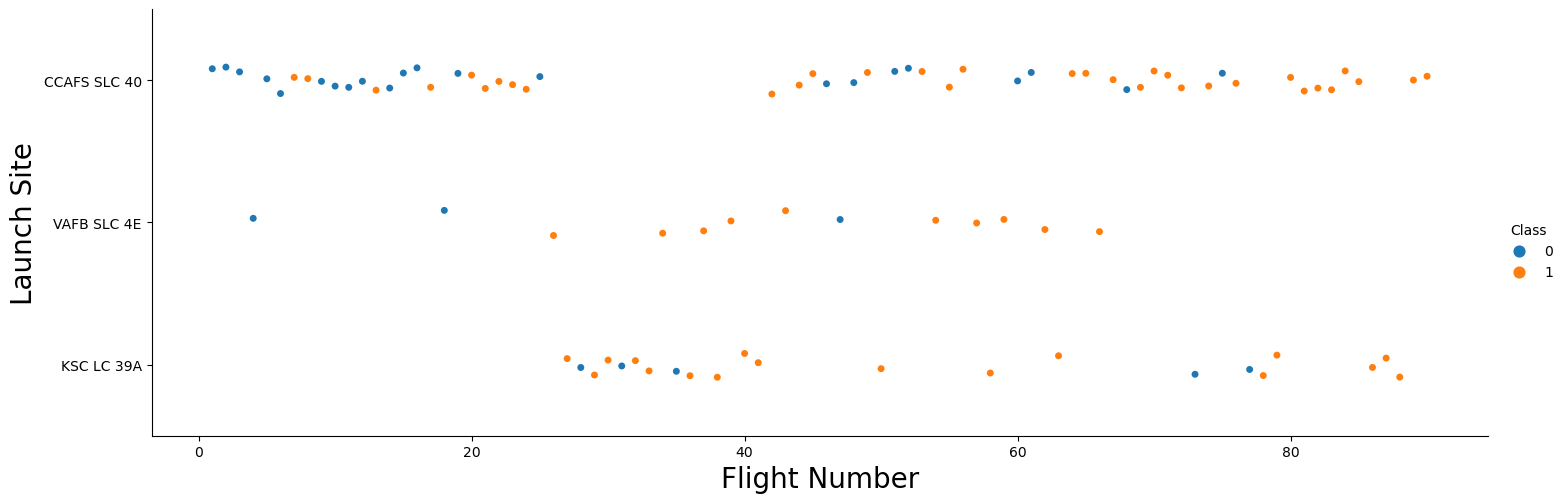

In [210]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

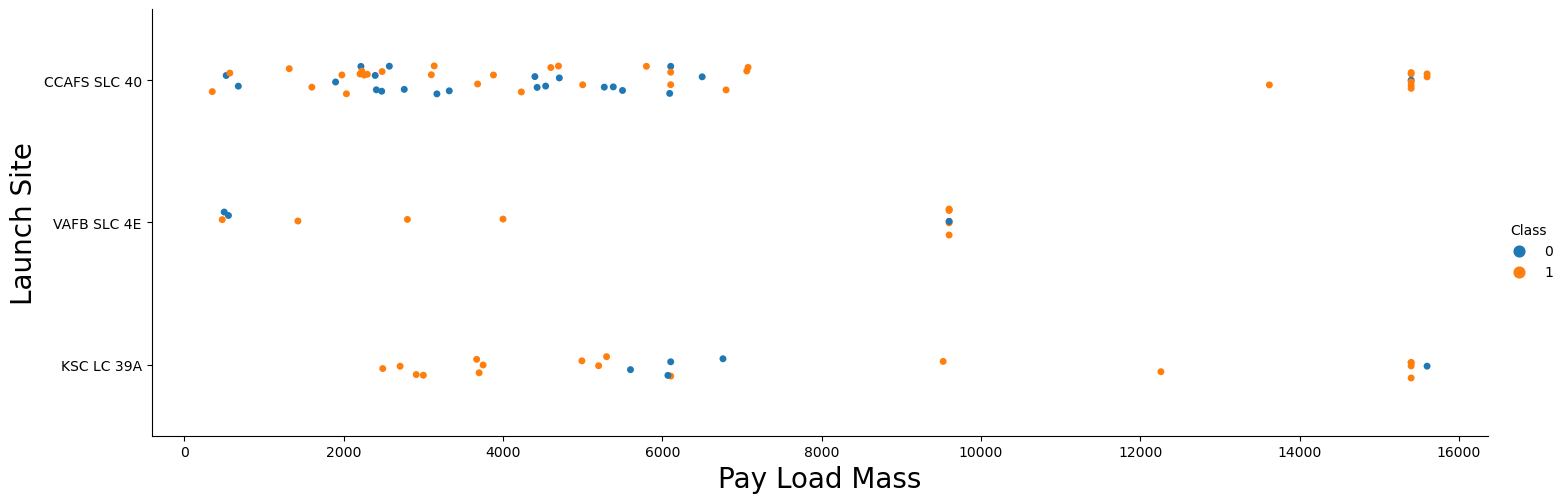

In [212]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay Load Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

In [235]:
df_bar=pd.DataFrame(df.groupby('Orbit')['Class'].mean())
df_bar.reset_index(inplace=True)

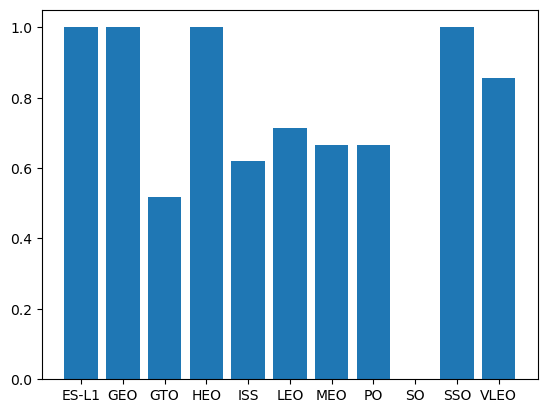

In [237]:
plt.bar(x=df_bar['Orbit'],height=df_bar['Class'])
plt.show()

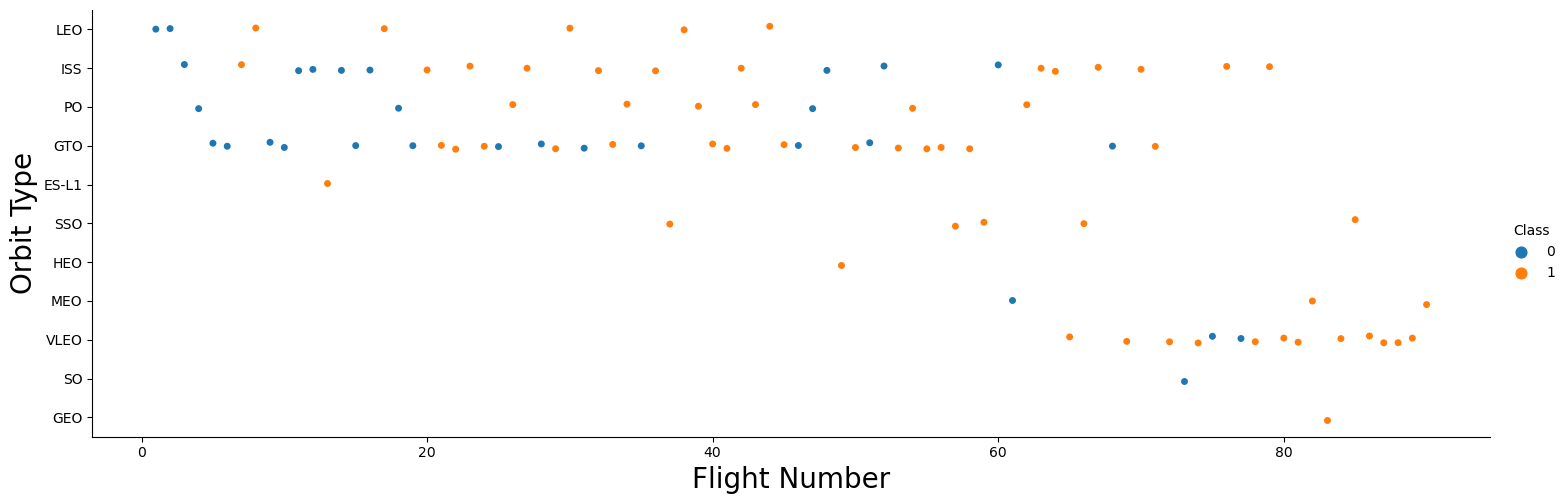

In [427]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

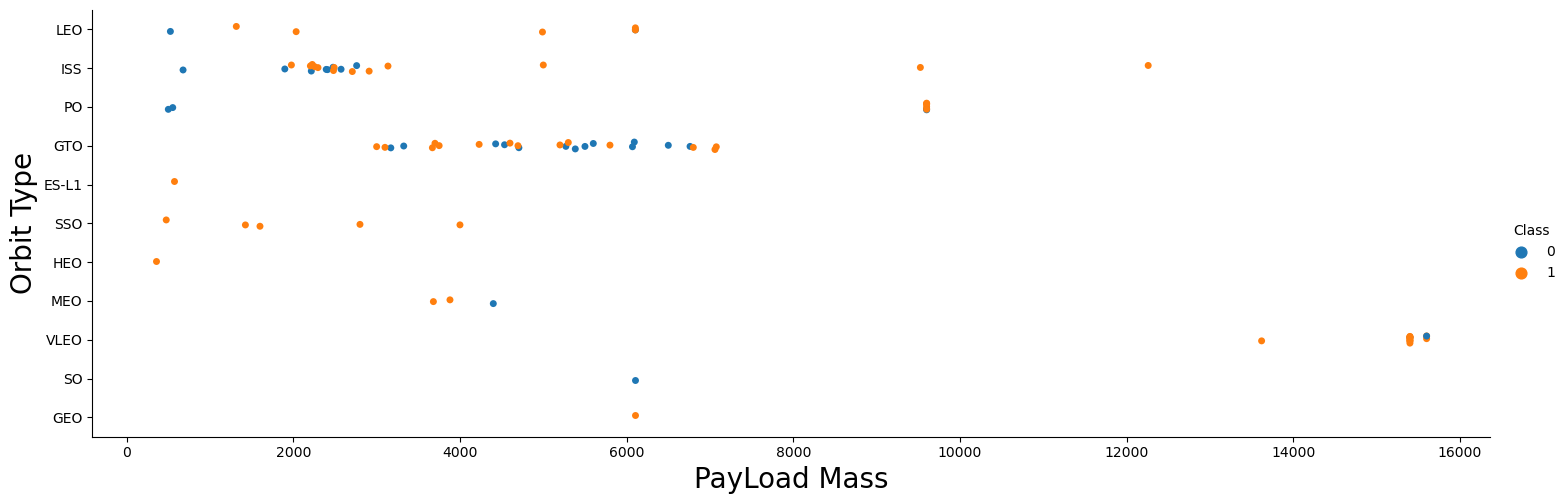

In [426]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("PayLoad Mass",fontsize=20)
plt.ylabel("Orbit Type",fontsize=20)
plt.show()

In [272]:
Year=[]
def Extract_Year(date):
    for i in df["Date"]:
        Year.append(i.split("-")[0])
    return Year

In [273]:
Year=Extract_Year(date)

In [274]:
df['Year']=Year

In [275]:
df.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  Year  
0            0  B0003  -80.577366  28.561857      0  2010  
1            0  B0005  -80.577366  28.561857      0  2012  
2            0  B0007  -80.577366  28.561857      0  2013  
3            0  B1003 -120.610829  34.632093      0  2013  
4            0  B1004  -80.577366  28.561857      0  2013

In [276]:
rate=pd.DataFrame(df.groupby('Year')['Class'].mean())

In [277]:
rate.reset_index(inplace=True)

In [278]:
rate.head()

Year     Class
0  2010  0.000000
1  2012  0.000000
2  2013  0.000000
3  2014  0.333333
4  2015  0.333333

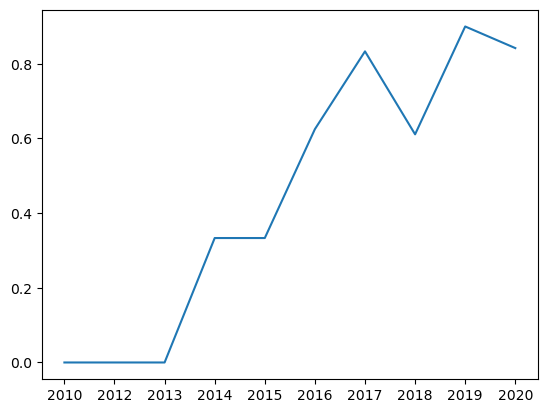

In [279]:
plt.plot(rate['Year'], rate['Class'])
plt.show()

In [297]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004

In [298]:
features_one=pd.get_dummies(features[['Orbit','LaunchSite','LandingPad','Serial']])

In [299]:
features_one

Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  \
0             0          0          0          0          0          1   
1             0          0          0          0          0          1   
2             0          0          0          0          1          0   
3             0          0          0          0          0          0   
4             0          0          1          0          0          0   
..          ...        ...        ...        ...        ...        ...   
85            0          0          0          0          0          0   
86            0          0          0          0          0          0   
87            0          0          0          0          0          0   
88            0          0          0          0          0          0   
89            0          0          0          0          0          0   

    Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0           0         0         0          0           0   
1           0         0         0          0           0   
2           0         0         0          0           0   
3           0         1         0          0           0   
4           0         0         0          0           0   
..        ...       ...       ...        ...         ...   
85          0         0         0          0           1   
86          0         0         0          0           1   
87          0         0         0          0           1   
88          0         0         0          0           1   
89          1         0         0          0           0   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0                         1                      0                       0   
1                         1                      0                       0   
2                         1                      0                       0   
3                         0                      0                       1   
4                         1                      0                       0   
..                      ...                    ...                     ...   
85                        0                      1                       0   
86                        0                      1                       0   
87                        0                      1                       0   
88                        1                      0                       0   
89                        1                      0                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   
..                                  ...                                  ...   
85                                    0                                    0   
86                                    0                                    0   
87                                    0                                    0   
88                                    0                                    0   
89                                    0                                    0   

    LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3032383ecb761634e7cb  \
0                                     0                                    0   
1                                     0                                    0   
2                                     0                                    0   
3                                     0                                    0   
4                                     0                                    0   
..              

In [302]:
features_one_hot= pd.concat([features.drop(columns = ['Orbit','LaunchSite','LandingPad','Serial']), features_one], axis = 1)

In [303]:
features_one_hot.head()

FlightNumber  PayloadMass  Flights  GridFins  Reused   Legs  Block  \
0             1  6104.959412        1     False   False  False    1.0   
1             2   525.000000        1     False   False  False    1.0   
2             3   677.000000        1     False   False  False    1.0   
3             4   500.000000        1     False   False  False    1.0   
4             5  3170.000000        1     False   False  False    1.0   

   ReusedCount  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  \
0            0            0          0          0          0          0   
1            0            0          0          0          0          0   
2            0            0          0          0          0          1   
3            0            0          0          0          0          0   
4            0            0          0          1          0          0   

   Orbit_LEO  Orbit_MEO  Orbit_PO  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
0          1          0         0         0          0           0   
1          1          0         0         0          0           0   
2          0          0         0         0          0           0   
3          0          0         1         0          0           0   
4          0          0         0         0          0           0   

   LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0                        1                      0                       0   
1                        1                      0                       0   
2                        1                      0                       0   
3                        0                      0                       1   
4                        1                      0                       0   

   LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3032383ecb761634e7cb  \
0                                    0                                    0   
1                                    0                                    0   
2                                    0                                    0   
3                                    0                                    0   
4                                    0                                    0   

   LandingPad_5e9e3033383ecbb9e534e7cc  Serial_B0003  Serial_B0005  \
0                                    0             1             0   
1                                    0             0             1   
2                                    0             0             0   
3                                    0             0             0   
4                                    0             0             0   

   Serial_B0007  Serial_B1003  Serial_B1004  Serial_B1005  Serial_B1006  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             1             0             0             0             0   
3             0             1             0             0             0   
4             0             0             1             0             0   

   Serial_B1007  Serial_B1008  Serial_B1010  Serial_B1011  Serial_B1012  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0   

In [311]:
features_one_hot=features_one_hot.astype('float64')

In [313]:
features_one_hot.to_csv('dataset_part_3.csv', index=False)

# Visual Analytics with Folium

In [314]:
!pip3 install folium
!pip3 install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=ff8aa81a47727bf0943b5273122420addba2fdc524cba4d957bb0ff2ea312f57
  Stored in directory: c:\users\bjkha\appdata\local\pip\cache\wheels\04\5f\3e\46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [315]:
import folium
import wget

In [316]:
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

In [317]:
# Download and read the `spacex_launch_geo.csv`
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df=pd.read_csv(spacex_csv_file)

100% [................................................................................] 7710 / 7710

In [318]:
# Select relevant sub-columns: `Launch Site`, `Lat(Latitude)`, `Long(Longitude)`, `class`
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index=False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]
launch_sites_df

Launch Site        Lat        Long
0   CCAFS LC-40  28.562302  -80.577356
1  CCAFS SLC-40  28.563197  -80.576820
2    KSC LC-39A  28.573255  -80.646895
3   VAFB SLC-4E  34.632834 -120.610745

In [319]:
# Start location is NASA Johnson Space Center
nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)

In [320]:
# Create a blue circle at NASA Johnson Space Center's coordinate with a popup label showing its name
circle = folium.Circle(nasa_coordinate, radius=1000, color='#d35400', fill=True).add_child(folium.Popup('NASA Johnson Space Center'))
# Create a blue circle at NASA Johnson Space Center's coordinate with a icon showing its name
marker = folium.map.Marker(
    nasa_coordinate,
    # Create an icon as a text label
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'NASA JSC',
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)

In [322]:
# Initial the map
site_map = folium.Map(location=nasa_coordinate, zoom_start=5)
# For each launch site, add a Circle object based on its coordinate (Lat, Long) values. In addition, add Launch site name as a popup label
site_map

In [323]:
from folium.plugins import MarkerCluster

In [339]:
marker1=folium.map.Marker([28.562302,-80.577356], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),
                                                               html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS LC-40', ))
marker2=folium.map.Marker([28.563197,-80.576820], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),
                                                               html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'CCAFS SLC-40', ))
marker3=folium.map.Marker([28.573255,-80.646895], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),
                                                               html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'KSC LC-39A', ))
marker4=folium.map.Marker([34.632834,-120.610745], icon=DivIcon(icon_size=(20,20),icon_anchor=(0,0),
                                                               html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % 'VAFB SLC-4E', ))

In [340]:
circle1 = folium.Circle([28.562302,-80.577356], radius=1000, color='#000000', fill=True).add_child(folium.Popup('CCAFS LC-40'))
circle2 = folium.Circle([28.563197,-80.576820], radius=1000, color='#000000', fill=True).add_child(folium.Popup('CCAFS SLC-40'))
circle3 = folium.Circle([28.573255,-80.646895], radius=1000, color='#000000', fill=True).add_child(folium.Popup('KSC LC-39A'))
circle4 = folium.Circle([34.632834,-120.610745], radius=1000, color='#000000', fill=True).add_child(folium.Popup('VAFB SLC-4E'))

In [341]:
site_map.add_child(circle1)
site_map.add_child(circle2)
site_map.add_child(circle3)
site_map.add_child(circle4)
site_map.add_child(marker1)
site_map.add_child(marker2)
site_map.add_child(marker3)
site_map.add_child(marker4)

In [342]:
spacex_df.tail(10)

Launch Site        Lat       Long  class
46    KSC LC-39A  28.573255 -80.646895      1
47    KSC LC-39A  28.573255 -80.646895      1
48    KSC LC-39A  28.573255 -80.646895      1
49  CCAFS SLC-40  28.563197 -80.576820      1
50  CCAFS SLC-40  28.563197 -80.576820      1
51  CCAFS SLC-40  28.563197 -80.576820      0
52  CCAFS SLC-40  28.563197 -80.576820      0
53  CCAFS SLC-40  28.563197 -80.576820      0
54  CCAFS SLC-40  28.563197 -80.576820      1
55  CCAFS SLC-40  28.563197 -80.576820      0

In [349]:
# Function to assign color to launch outcome
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'
    
spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)
spacex_df.tail()

Launch Site        Lat      Long  class marker_color
51  CCAFS SLC-40  28.563197 -80.57682      0          red
52  CCAFS SLC-40  28.563197 -80.57682      0          red
53  CCAFS SLC-40  28.563197 -80.57682      0          red
54  CCAFS SLC-40  28.563197 -80.57682      1        green
55  CCAFS SLC-40  28.563197 -80.57682      0          red

In [344]:
marker_cluster = MarkerCluster()

# Predictive Analysis

In [408]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [363]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [372]:
data=pd.read_csv('data')

In [374]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [377]:
data.head()

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

In [378]:
X=pd.read_csv('X')

In [379]:
X.drop(['Unnamed: 0'], axis=1, inplace=True)

In [380]:
X.head()

FlightNumber  PayloadMass  Flights  Block  ReusedCount  Orbit_ES-L1  \
0           1.0  6104.959412      1.0    1.0          0.0          0.0   
1           2.0   525.000000      1.0    1.0          0.0          0.0   
2           3.0   677.000000      1.0    1.0          0.0          0.0   
3           4.0   500.000000      1.0    1.0          0.0          0.0   
4           5.0  3170.000000      1.0    1.0          0.0          0.0   

   Orbit_GEO  Orbit_GTO  Orbit_HEO  Orbit_ISS  Orbit_LEO  Orbit_MEO  Orbit_PO  \
0        0.0        0.0        0.0        0.0        1.0        0.0       0.0   
1        0.0        0.0        0.0        0.0        1.0        0.0       0.0   
2        0.0        0.0        0.0        1.0        0.0        0.0       0.0   
3        0.0        0.0        0.0        0.0        0.0        0.0       1.0   
4        0.0        1.0        0.0        0.0        0.0        0.0       0.0   

   Orbit_SO  Orbit_SSO  Orbit_VLEO  LaunchSite_CCAFS SLC 40  \
0       0.0        0.0         0.0                      1.0   
1       0.0        0.0         0.0                      1.0   
2       0.0        0.0         0.0                      1.0   
3       0.0        0.0         0.0                      0.0   
4       0.0        0.0         0.0                      1.0   

   LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     1.0   
4                    0.0                     0.0   

   LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3032383ecb761634e7cb  \
0                                  0.0                                  0.0   
1                                  0.0                                  0.0   
2                                  0.0                                  0.0   
3                                  0.0                                  0.0   
4                                  0.0                                  0.0   

   LandingPad_5e9e3033383ecbb9e534e7cc  Serial_B0003  Serial_B0005  \
0                                  0.0           1.0           0.0   
1                                  0.0           0.0           1.0   
2                                  0.0           0.0           0.0   
3                                  0.0           0.0           0.0   
4                                  0.0           0.0           0.0   

   Serial_B0007  Serial_B1003  Serial_B1004  Serial_B1005  Serial_B1006  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           1.0           0.0           0.0           0.0           0.0   
3           0.0           1.0           0.0           0.0           0.0   
4           0.0           0.0           1.0           0.0           0.0   

   Serial_B1007  Serial_B1008  Serial_B1010  Serial_B1011  Serial_B1012  \
0           0.0           0.0           0.0           0.0           0.0   
1           0.0           0.0           0.0           0.0           0.0   
2           0.0           0.0           0.0           0.0           0.0   
3           0.0           0.0           0.0           0.0           0.0   
4           0.0           0.0           0.0           0.0           0.0   

   Serial_B1013  Serial_B1015  Serial_B1016  Serial_B1017  Serial_B1018  \
0           0.0           0.0  

In [381]:
Y=data['Class'].to_numpy()

In [382]:
# students get this 
transform = preprocessing.StandardScaler()
X_std=transform.fit_transform(X)

In [383]:
X_train, X_test, Y_train, Y_test=train_test_split(X_std, Y, test_size=0.2, random_state=2)

In [384]:
Y_test.shape

(18,)

In [385]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [386]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

In [388]:
logreg_cv=GridSearchCV(
    estimator=lr,
    param_grid=parameters,
    cv=10)

In [389]:
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [390]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


In [393]:
logreg_cv.score(X_test,Y_test)

0.8333333333333334

In [409]:
accuracy_score(Y_test,yhat)

0.8333333333333334

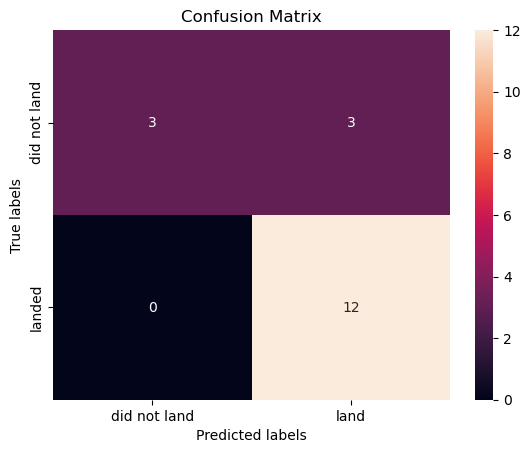

In [391]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [395]:
parameters1 = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [396]:
svm_cv=GridSearchCV(
    estimator=svm,
    param_grid=parameters1,
    cv=10)

In [397]:
svm_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [398]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


In [399]:
svm_cv.score(X_test,Y_test)

0.8333333333333334

In [411]:
accuracy_score(Y_test,yhat1)

0.8333333333333334

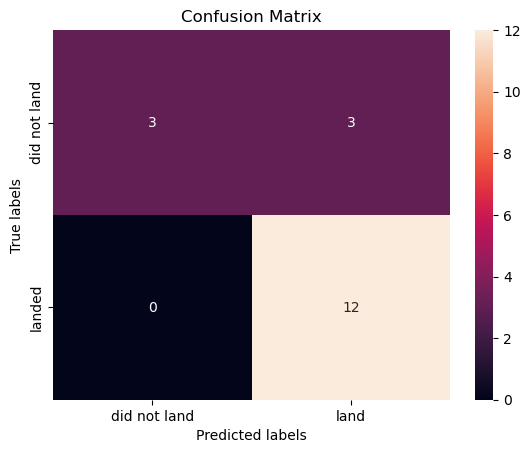

In [424]:
yhat1=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat1)

In [402]:
parameters2 = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [403]:
tree_cv=GridSearchCV(
    estimator=tree,
    param_grid=parameters2,
    cv=10)

In [404]:
tree_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [405]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8857142857142856


In [406]:
tree_cv.score(X_test,Y_test)

0.8333333333333334

In [413]:
accuracy_score(Y_test,yhat2)

0.8333333333333334

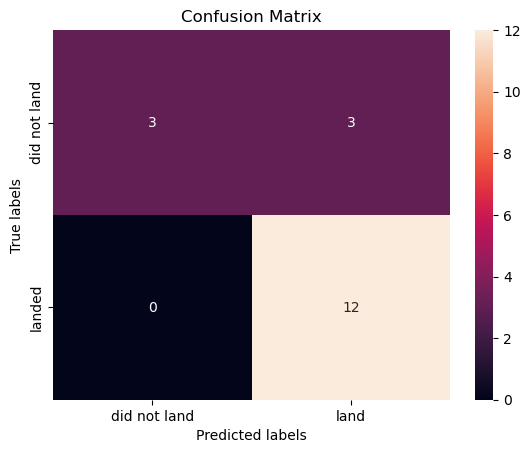

In [423]:
yhat2 = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat2)

In [414]:
parameters3 = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [415]:
knn_cv=GridSearchCV(
    estimator=KNN,
    param_grid=parameters3,
    cv=10)

In [416]:
knn_cv.fit(X_train,Y_train)

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [418]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


In [417]:
knn_cv.score(X_test,Y_test)

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8333333333333334

In [422]:
accuracy_score(Y_test,yhat3)

0.8333333333333334

C:\Users\bjkha\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


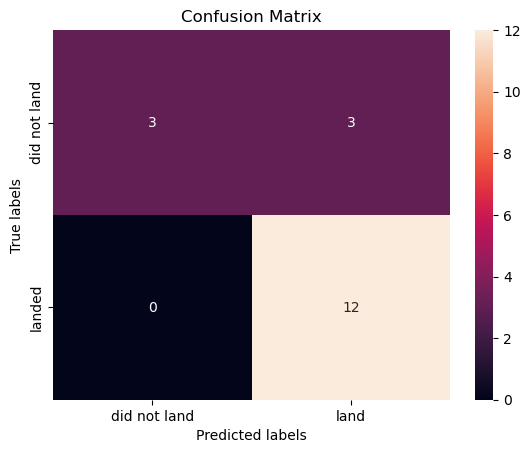

In [421]:
yhat3 = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat3)